In [ ]:
# instalar librerias
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy

In [29]:
# importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# cargar los datos del dataset
csv_file = './../data/customer_shopping_data.csv'
df = pd.read_csv(csv_file)
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [31]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [32]:
# ver la informacion de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [33]:
# estadisticas descriptivas generales
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [34]:
# media y mediana de los datos
print("Media de las características numéricas:")
print(df.select_dtypes(include=[np.number]).mean())

print("\nMediana de las características numéricas:")
print(df.select_dtypes(include=[np.number]).median())

Media de las características numéricas:
age          43.427089
quantity      3.003429
price       689.256321
dtype: float64

Mediana de las características numéricas:
age          43.0
quantity      3.0
price       203.3
dtype: float64


In [35]:
# verificar si hay valores nulos
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [36]:
# verificar si hay valores duplicados
df.duplicated().any()

np.False_

In [37]:
# transformar la columna invoice_date a fecha
df["invoice_date"] = pd.to_datetime(df["invoice_date"], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [38]:
# crear una nueva columna con el precio total
df["total_price"] = df["price"] * df["quantity"]
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00


In [39]:
# ver la distribucion de las categorias
df["category"].value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

In [40]:
# ver la distribucion de los metodos de pago
df["payment_method"].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [41]:
# ver la distribucion de los centros comerciales
df["shopping_mall"].value_counts()

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

In [42]:
# ver la distribucion de las fechas
df["invoice_date"].value_counts()

invoice_date
2021-11-24    159
2023-02-26    156
2022-10-23    155
2021-01-06    155
2022-07-25    155
             ... 
2021-10-27     98
2022-10-18     98
2021-09-30     96
2021-12-02     94
2022-01-16     93
Name: count, Length: 797, dtype: int64

In [43]:
# funcion para obtener el precio total por categoria
def total_price_by_category(df):
  return df.groupby("category")["total_price"].sum().sort_values(ascending=False)

total_price_by_category(df)

category
Clothing           1.139968e+08
Shoes              6.655345e+07
Technology         5.786235e+07
Cosmetics          6.792863e+06
Toys               3.980426e+06
Food & Beverage    8.495351e+05
Books              8.345529e+05
Souvenir           6.358247e+05
Name: total_price, dtype: float64

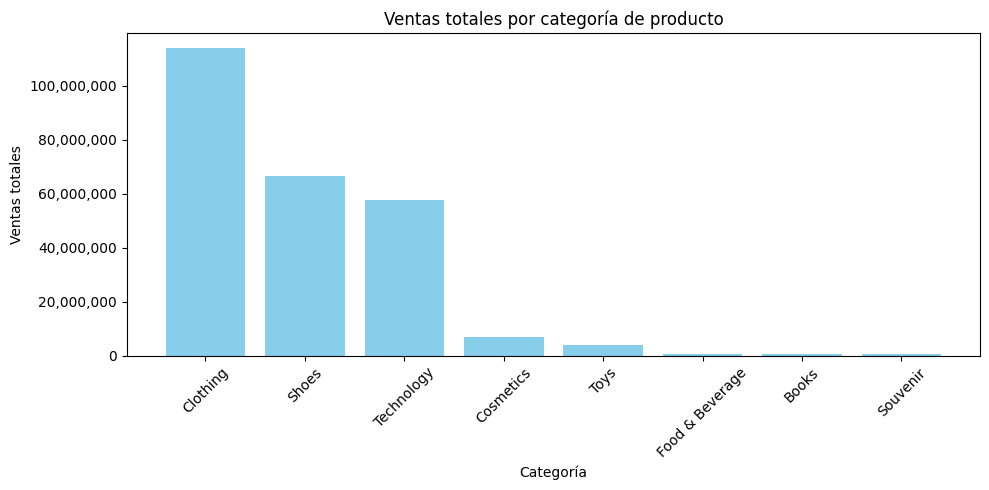

In [44]:
# generar gráfica
plt.figure(figsize=(10, 5))
plt.bar(total_price_by_category(df).index, total_price_by_category(df).values, color="skyblue")
plt.xlabel("Categoría")
plt.ylabel("Ventas totales")
plt.title("Ventas totales por categoría de producto")
plt.xticks(rotation=45)
plt.ticklabel_format(style="plain", axis="y")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.tight_layout()
plt.show()

In [45]:
# funcion para obtener el precio total por metodo de pago
def total_price_by_payment_method(df):
  return df.groupby("payment_method")["total_price"].sum().sort_values(ascending=False)

total_price_by_payment_method(df)

payment_method
Cash           1.128322e+08
Credit Card    8.807712e+07
Debit Card     5.059643e+07
Name: total_price, dtype: float64

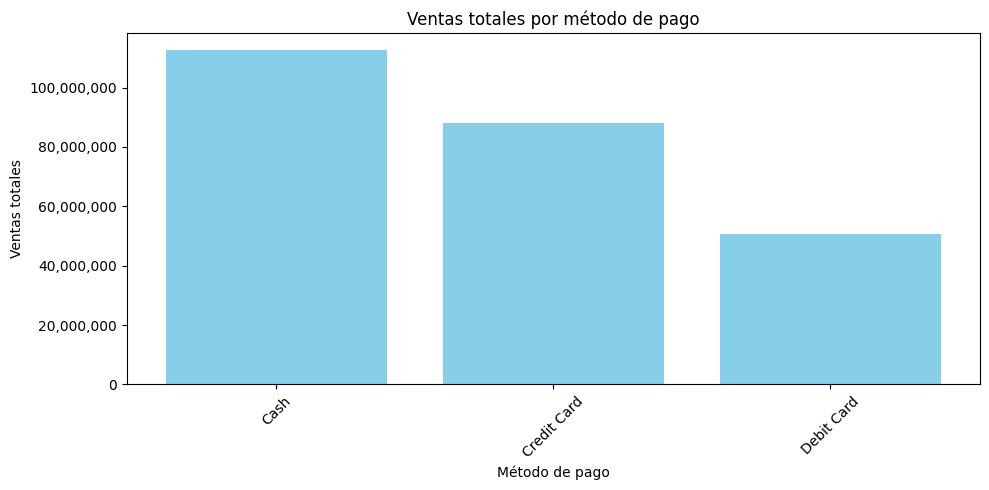

In [46]:
# generar gráfica
plt.figure(figsize=(10, 5))
plt.bar(total_price_by_payment_method(df).index, total_price_by_payment_method(df).values, color="skyblue")
plt.xlabel("Método de pago")
plt.ylabel("Ventas totales")
plt.title("Ventas totales por método de pago")
plt.xticks(rotation=45)
plt.ticklabel_format(style="plain", axis="y")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.tight_layout()
plt.show()

In [47]:
# funcion para obtener el precio total por centro comercial
def total_price_by_shopping_mall(df):
  return df.groupby("shopping_mall")["total_price"].sum().sort_values(ascending=False)

total_price_by_shopping_mall(df)

shopping_mall
Mall of Istanbul     50872481.68
Kanyon               50554231.10
Metrocity            37302787.33
Metropol AVM         25379913.19
Istinye Park         24618827.68
Zorlu Center         12901053.82
Cevahir AVM          12645138.20
Viaport Outlet       12521339.72
Emaar Square Mall    12406100.29
Forum Istanbul       12303921.24
Name: total_price, dtype: float64

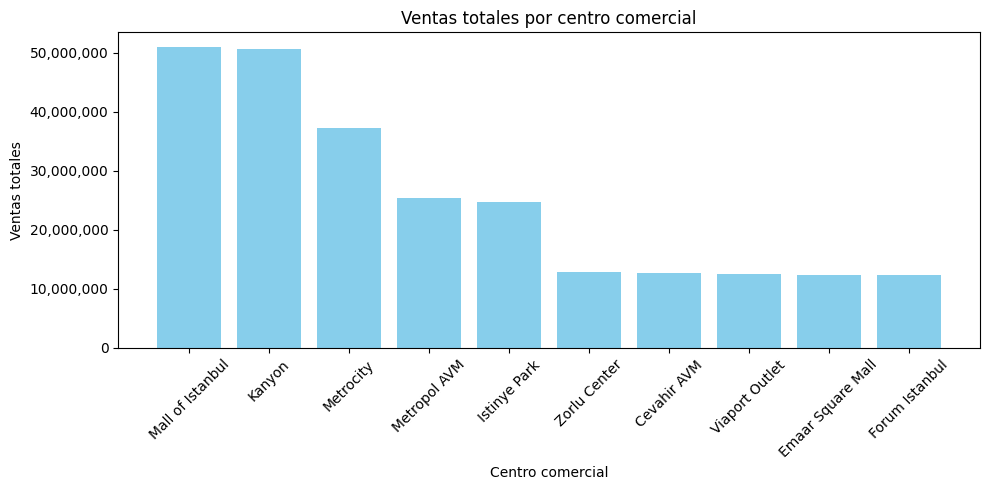

In [48]:
# generar gráfica
plt.figure(figsize=(10, 5))
plt.bar(total_price_by_shopping_mall(df).index, total_price_by_shopping_mall(df).values, color="skyblue")
plt.xlabel("Centro comercial")
plt.ylabel("Ventas totales")
plt.title("Ventas totales por centro comercial")
plt.xticks(rotation=45)
plt.ticklabel_format(style="plain", axis="y")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.tight_layout()
plt.show()

In [49]:
# funcion para obtener el total de ventas por genero
def total_price_by_gender(df):
  return df.groupby("gender")["total_price"].sum()

total_price_by_gender(df)

gender
Female    1.502071e+08
Male      1.012987e+08
Name: total_price, dtype: float64

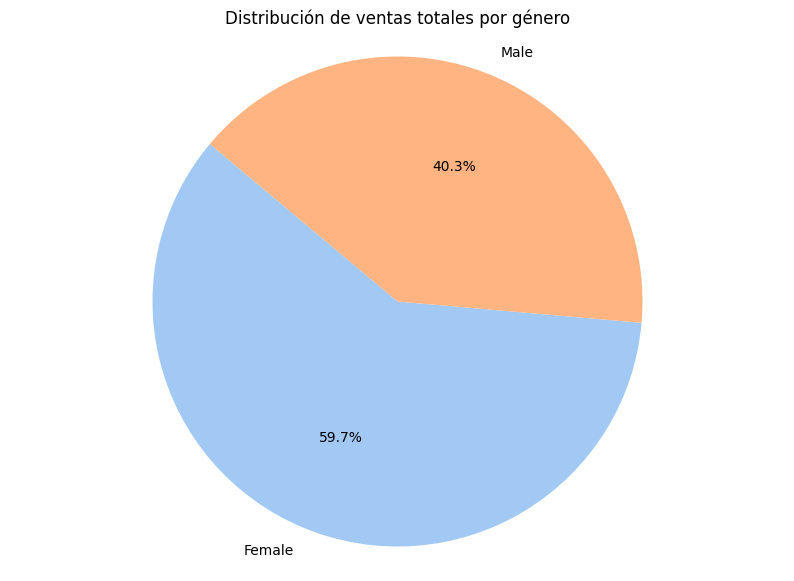

In [50]:
# generar gráfica
plt.figure(figsize=(10, 7))
plt.pie(total_price_by_gender(df).values, labels=total_price_by_gender(df).index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribución de ventas totales por género")
plt.axis('equal')
plt.show()

In [51]:
# funcion para obtener el total de ventas por mes
def total_price_by_month(df):
  df["invoice_date"] = pd.to_datetime(df["invoice_date"])
  df["month"] = df["invoice_date"].dt.month
  return df.groupby("month")["total_price"].sum()

total_price_by_month(df)

month
1     28891525.59
2     26625090.10
3     21956191.33
4     18715685.98
5     19719331.10
6     18933775.30
7     20378722.63
8     19282361.29
9     18795794.91
10    20545090.43
11    18207139.95
12    19455085.64
Name: total_price, dtype: float64

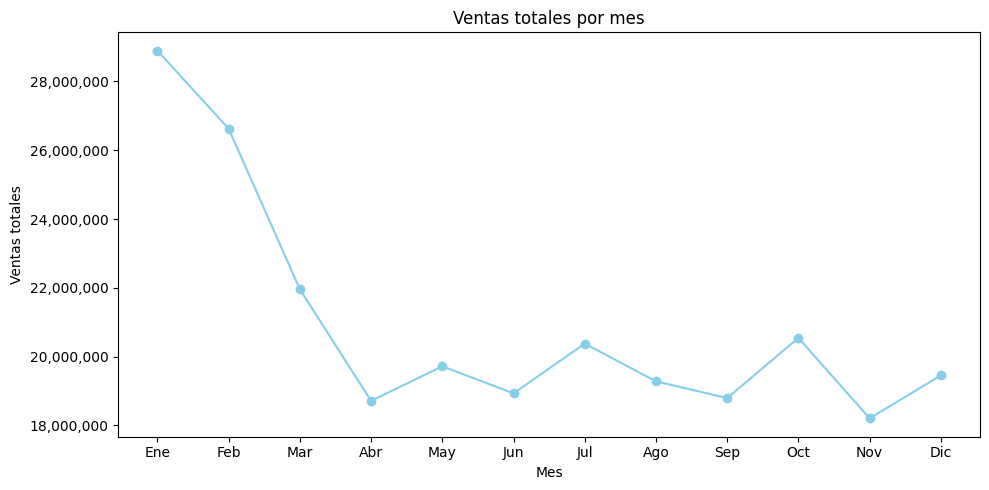

In [52]:
# generar gráfica
plt.figure(figsize=(10, 5))
plt.plot(total_price_by_month(df).index, total_price_by_month(df).values, marker="o", color="skyblue")
plt.xlabel("Mes")
plt.ylabel("Ventas totales")
plt.title("Ventas totales por mes")
plt.xticks(range(1, 13), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.ticklabel_format(style="plain", axis="y")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.tight_layout()
plt.show()